# Final Project - Breast Cancer Detection/Prediction


**Data Source:** Breast Cancer Wisconsin (Diagnostic) Data Set
https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

In [1]:
# import libraries 
import pandas as pd      # Import Pandas for data manipulation using dataframes
import numpy as np       # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import seaborn as sns           # Statistical data visualization


In [2]:
#import the data feom my D Drive folder
df_cancer = pd.read_csv('D:\Python for Data Science\Week 10 - Assignment/cancer.csv')

In [3]:
# count the number of columns and rows in the df_cancer data set 
df_cancer.shape

(569, 33)

In [4]:
# analyse the data set - Column diagnoses has two values: M (Malign) or B (Benign)
# The other columns describe the features for every patient's type of breast cancer
df_cancer.head(7)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.1127,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN


In [5]:
# count the number of the empty (NaN, NAN, na) values in each column
df_cancer.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

we can see that this dataset is already clean and does not have any empty values, except the Unnamed column.

In [6]:
#Drop the column with all missing values (axis=1 = defining the columns)
df_cancer = df_cancer.dropna(axis=1)

In [7]:
# get the new count of the number and rows
df_cancer.shape

(569, 32)

In [8]:
# Get a count of the number of Malignant (M) and Bening (B) cells
df_cancer['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

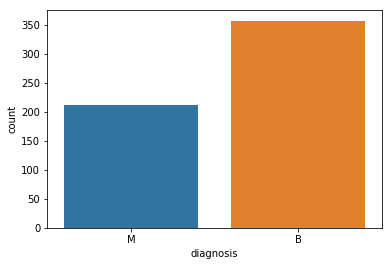

In [9]:
# Visualise the count
sns.countplot(df_cancer['diagnosis'], label='count')

In [10]:
#Categorise the data by lebeling 
df_cancer.dtypes


id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [11]:
#Encode the categorical data values
from sklearn.preprocessing import LabelEncoder
labelencoder_Y=LabelEncoder()
df_cancer.iloc[:,1]=labelencoder_Y.fit_transform(df_cancer.iloc[:,1].values)
# df_cancer.iloc[:,1].values - run this to see what the fit_transform has converted to numerical values
df_cancer.iloc[:,1].head(-5)

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     0
20     0
21     0
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
      ..
534    0
535    1
536    1
537    0
538    0
539    0
540    0
541    0
542    0
543    0
544    0
545    0
546    0
547    0
548    0
549    0
550    0
551    0
552    0
553    0
554    0
555    0
556    0
557    0
558    0
559    0
560    0
561    0
562    1
563    1
Name: diagnosis, Length: 564, dtype: int32

C:\Users\V\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\V\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


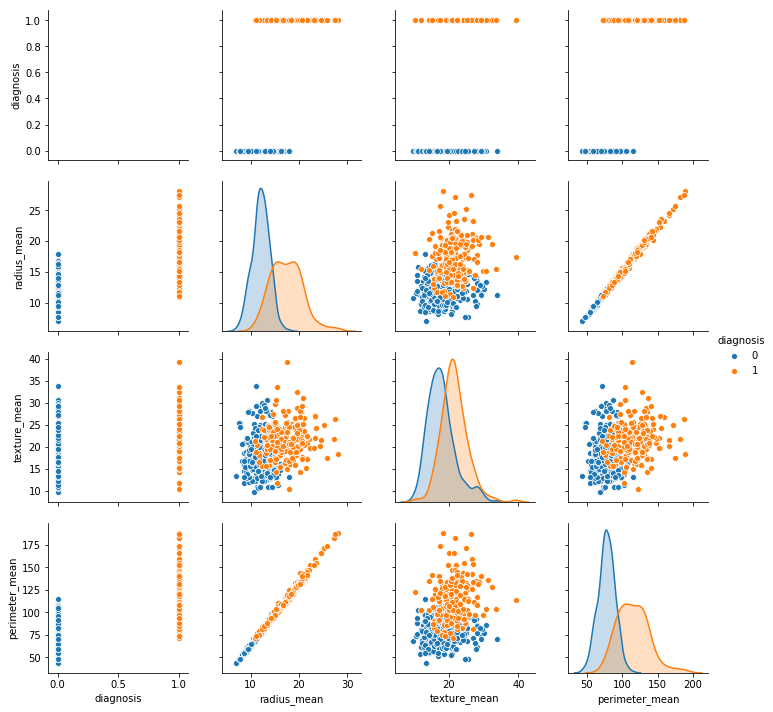

In [12]:
# Create a pair plot
sns.pairplot(df_cancer.iloc[:,1:5], hue='diagnosis')

The diagnosis points in the graphs: we can see the Benigne cells (blue) and the Maligne cells (orange) for the first 4 columns ( 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean') paired together

In [13]:
df_cancer.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [14]:
#Get the coorelation of the columns

df_cancer.iloc[:,1:12].corr()

#we can see how one column influences the other columns for example:
# radius_mean, perimeter mean has a positive influence in the diagnoses 
# fractal_dimension_mean has a negative influence in the diagnosis column


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,-0.012838
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921


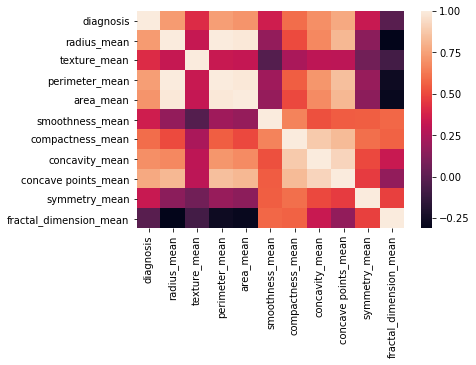

In [15]:
# Visualise the correlation
sns.heatmap(df_cancer.iloc[:,1:12].corr())

#the lighter the colour the higher the influence to the diagnosis column, the darker the smaller the influence to this column 

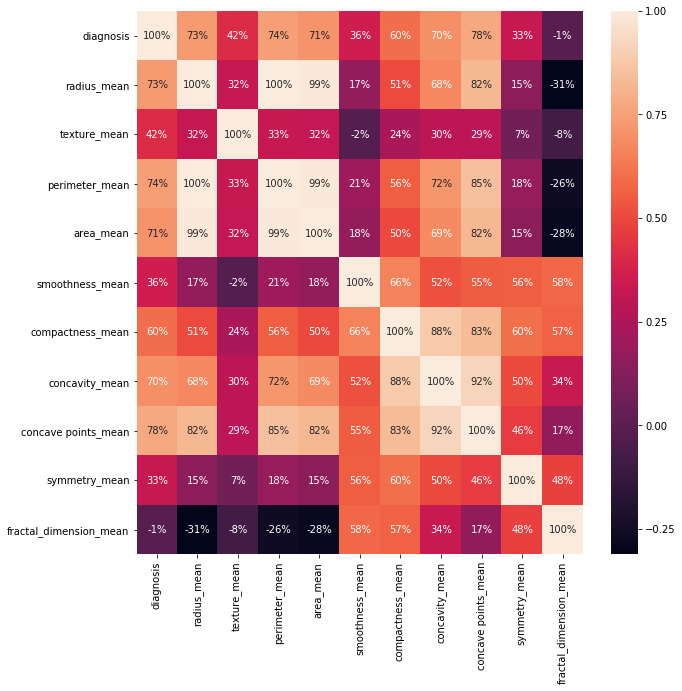

In [16]:
# for a better visualisation lets increase the size of the plot, add annotation and format them with one decimal point
plt.figure(figsize=(10,10))
sns.heatmap(df_cancer.iloc[:,1:12].corr(), annot=True, fmt='.0%')


# Detect Cancer Cells

In [17]:
# Split the data set into independet (X) and dependet (Y) dat sets
X=df_cancer.iloc[:,2:31].values # the features that can tell us if the patient hascancer or not
Y=df_cancer.iloc[:,1].values # is going to tell us if the patient has cancer or not

#we change the sets in arrays to get the parameters that we want to use

In [18]:
# I am going to use 70% of the data for training and 30% for testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=0)

In [19]:
#Scale the data (Feature Scaling) X, Y to be inside the same scale
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()

#scale my feature data 
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [20]:
X_train #check what it has inside

array([[-0.74998027, -1.09978744, -0.74158608, ..., -0.04627198,
        -0.6235968 ,  0.07754241],
       [-1.02821446, -0.1392617 , -1.02980434, ..., -0.95489389,
        -0.7612376 , -1.07145262],
       [-0.53852228, -0.29934933, -0.56857428, ..., -0.38460243,
        -0.50470441,  0.34900827],
       ...,
       [-1.3214733 , -0.20855336, -1.3143845 , ..., -0.79857797,
        -0.98621857, -0.69108476],
       [-1.24245479, -0.23244704, -1.27759928, ..., -1.3913039 ,
        -1.7562754 , -1.55125275],
       [-0.74441558,  1.13188181, -0.72016173, ...,  0.48946107,
        -0.28490593, -1.2308599 ]])

In [21]:
# Create a function for the models
def models(X_train, Y_train):
    
    #Logistic Regression
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state=0)
    log.fit(X_train,Y_train)
    
    # Decision Tree
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion = 'entropy', random_state=0)
    tree.fit(X_train, Y_train)
    
    #Print the models' accurancy 
    print('[0]Logistic Regression Training Accurancy:', log.score(X_train, Y_train))
    print('[1]Decision Tree Training Accurancy:', tree.score(X_train, Y_train))
    
    return log, tree

In [22]:
# Getting the accurrancy for the two algorithms used

model=models(X_train, Y_train)

[0]Logistic Regression Training Accurancy: 0.9899497487437185
[1]Decision Tree Training Accurancy: 1.0


C:\Users\V\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


The training model that did the best is Decision Tree  at **100%** accurancy 

In [23]:
#Test the created  model accurancy on my testing data using Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, model[0].predict(X_test))
print(cm)

[[104   4]
 [  2  61]]


This means that the model created has a True positive of 104 and a False Positive of 61;
a True negative of 4 and a False negative of 4

In [24]:
for i in range( len(model) ):
    print('Model', i)
    cm = confusion_matrix(Y_test, model[i].predict(X_test))

    TP = cm[0][0]
    TN = cm[1][1]
    FN = cm[1][0]
    FP = cm[0][1]

    print(cm)
    print('Testing accurancy=', ((TP+TN)/(TP+TN+FN+FP)))
    print()


Model 0
[[104   4]
 [  2  61]]
Testing accurancy= 0.9649122807017544

Model 1
[[102   6]
 [  4  59]]
Testing accurancy= 0.9415204678362573



Looks like the model does the best in the testing data is the first model: Logistic Regression with 96% accurancy 

In [26]:
# Ather way of getting metrics of the models

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

print(classification_report(Y_test, model[0].predict(X_test)))
print(accuracy_score(Y_test, model[0].predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       108
           1       0.94      0.97      0.95        63

   micro avg       0.96      0.96      0.96       171
   macro avg       0.96      0.97      0.96       171
weighted avg       0.97      0.96      0.97       171

0.9649122807017544


Above the metrics for the Logistic Regression model Model[0]

In [27]:
# Ather way of getting metrics of the models

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

print(classification_report(Y_test, model[1].predict(X_test)))
print(accuracy_score(Y_test, model[1].predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       108
           1       0.91      0.94      0.92        63

   micro avg       0.94      0.94      0.94       171
   macro avg       0.93      0.94      0.94       171
weighted avg       0.94      0.94      0.94       171

0.9415204678362573


Above the Metrics for the Decision Tree Model Model[1]

In [28]:
#Print the prediction of Logistic Regression Model (Model[0])

pred = model[0].predict(X_test)
print(pred)
print()
print(Y_test)

[1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 1
 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 1 0 1 1 1 0 0 0]

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 1
 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 1 0 1 1 1 0 0 0]


In [29]:
#Print the prediction of Decission Tree Model (Model[1])
pred = model[1].predict(X_test)
print(pred) # print what the model predicts for each patient
print()
print(Y_test) # print the true data

[1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 1 1 0 0
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 1 0 0
 0 0 0 0 0 1 0 1 0 1 0 1 1 0 1 1 0 1 1 1 0 0 0]

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 1
 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 1 0 1 1 1 0 0 0]
